## Author : Braham Parkash

## Data Science & Business Analytics Internship
## GRIP - The Spark Foundation
## Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
Machine learning can be of four types- Supervised, Unsupervised, Semi-supervised and Reinforcement learning. Unlike Supervised learning, Unsupervised learning has features measured for n observations but has no response, i.e., we have unlabeled training data. In this situation we cannot predict a response (as there is no response variable) and therefore we are left with the task of finding interesting patterns in the data. Some of the important unsupervised learning algorithms are - Clustering, Principal Component Analysis(PCA) and Association Rule learning. In this kernel we will explore Clustering and PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.duplicated().sum()

3

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
print('Data has {} number of rows and {} columns'.format(data.shape[0],data.shape[1]))

Data has 147 number of rows and 5 columns


In [ ]:
print('The columns set in our dataset :',data.columns)

The columns set in our dataset : Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
#Frequency distribution of species
iris_tab=pd.crosstab(index=data['species'],columns='count')
iris_tab

col_0,count
species,
Iris-setosa,48
Iris-versicolor,50
Iris-virginica,49



## Step 3 : Data Visualization

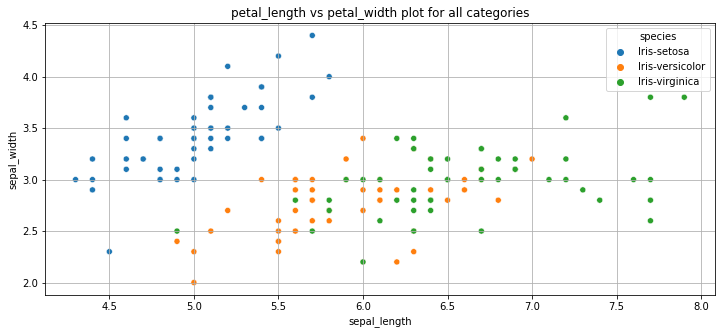

In [ ]:
#numeric v/s numeric v/s categorical
plt.figure(figsize=(12,5))
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='species')
plt.title('sepal_length vs sepal_width plot for all categories')
plt.grid()
plt.show()

Observations: 
* Here the plot indicates that Iris-Setosa forms a cluster that can be seperated from other categories based on sepal_length and sepal_width. While other 2 are mixed and cannot be seperated directly

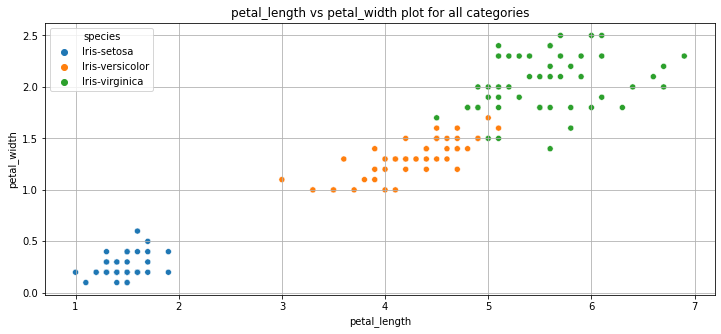

In [ ]:
#numeric v/s numeric v/s categorical
plt.figure(figsize=(12,5))
sns.scatterplot(x='petal_length',y='petal_width',data=data,hue='species')
plt.title('petal_length vs petal_width plot for all categories')
plt.grid()
plt.show()

Observations: 
* Here also the plot indicates that Iris-Setosa forms a seperate cluster that can be extracted from other categories based on petal_length and petal_width. While other 2 can also be seperated .
*  We can say that if the petal_length<2 and petal_width <0.95 the class is Setosa
*  And if the petal_length is between (2.9 and 5) and petal_width is between (1 and 1.75) the class is Versicolor

*  And if the petal_length is between (4.75 and 7) and petal_width is between (1.6 and 2.5) the class is Virginica

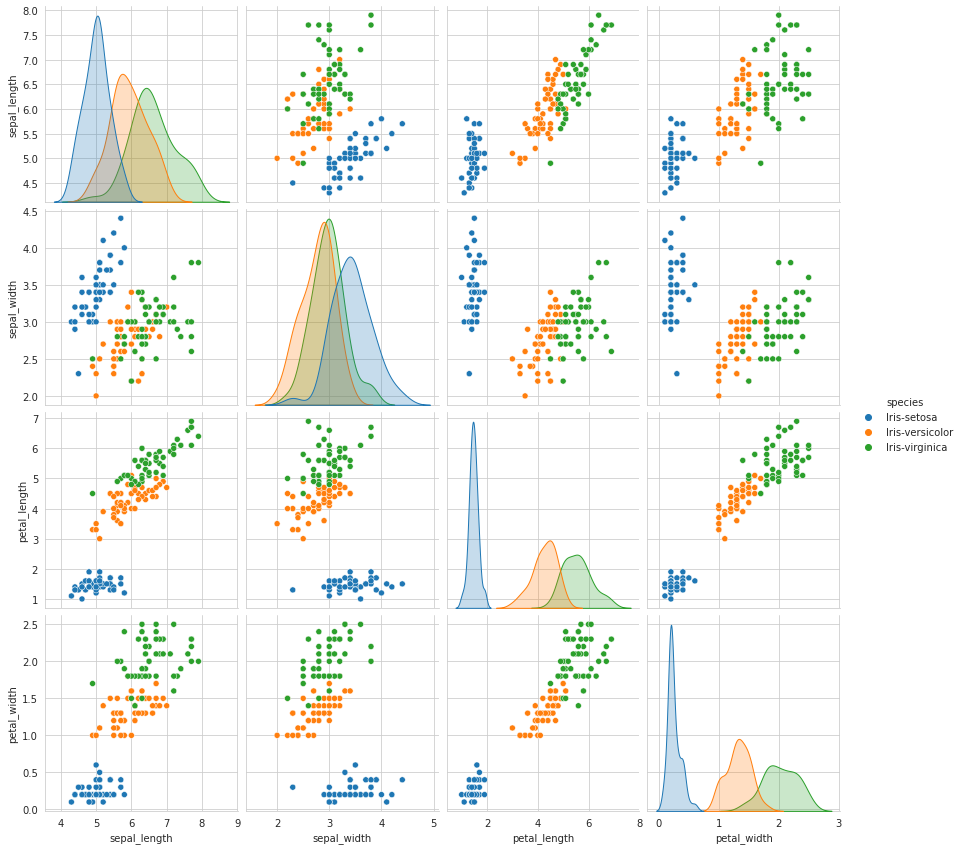

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='species',size=3)

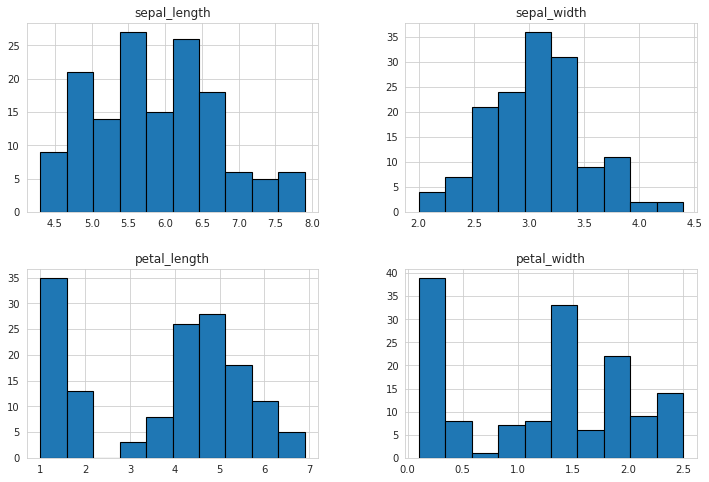

In [ ]:
data.hist(edgecolor='black',linewidth=1.1,figsize=(12,8))
plt.show()

In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


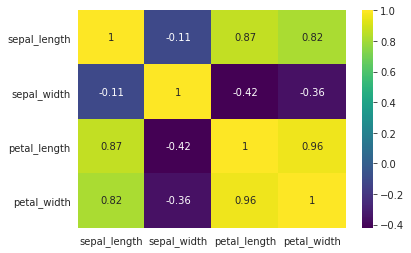

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt='.2g',cmap='viridis')

* petal_length is higly correlated with sepal_length and petal_width and vice-versa.
* sepal_width is not correlated with any feature it can be useful in seperating features 


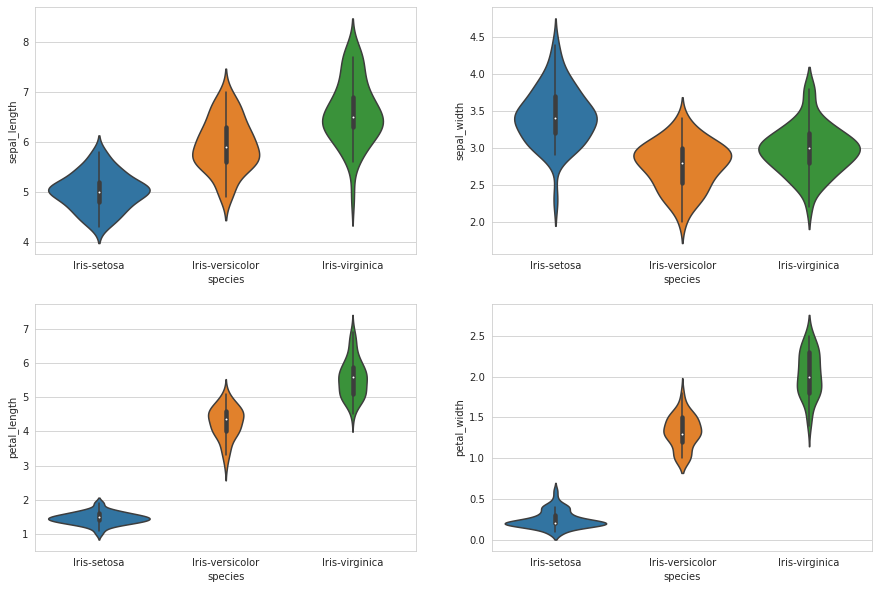

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=data)
plt.show()

* The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

## K-Means Clustering
* K-Mean is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
# How to Implementing K-Means Clustering ?
* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4

In [ ]:
#Finding the optimum number of clusters for k-means classification
x=data.drop('species',axis=1)
from sklearn.cluster import KMeans,DBSCAN
loss=[] #within cluster sum of squares
for  i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=95,n_jobs=-1)
  kmeans.fit(x)
  loss.append(kmeans.inertia_)




In [ ]:
print(loss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.930963049671746, 34.19068792479662, 30.085307692307694, 28.00125, 26.12505353959766, 24.597786190074117, 23.210184065934065, 21.41811904761905, 20.162814935064937]


# Using the elbow method to determine the optimal number of clusters for k-means clustering

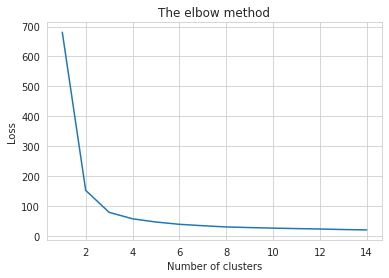

In [ ]:
plt.plot(range(1,15),loss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss') 
plt.show()

The bend in the curve is at 3.

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=95,n_jobs=-1)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
#Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='orange',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()
plt.show()

TypeError: ignored

<Figure size 1080x720 with 0 Axes>

## Prediction

In [ ]:
data['predicted']=y_kmeans

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
centroids=kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
df=data.copy()
df["species"]=df["species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
df['predicted']=y_kmeans
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['species'],y_kmeans)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]])

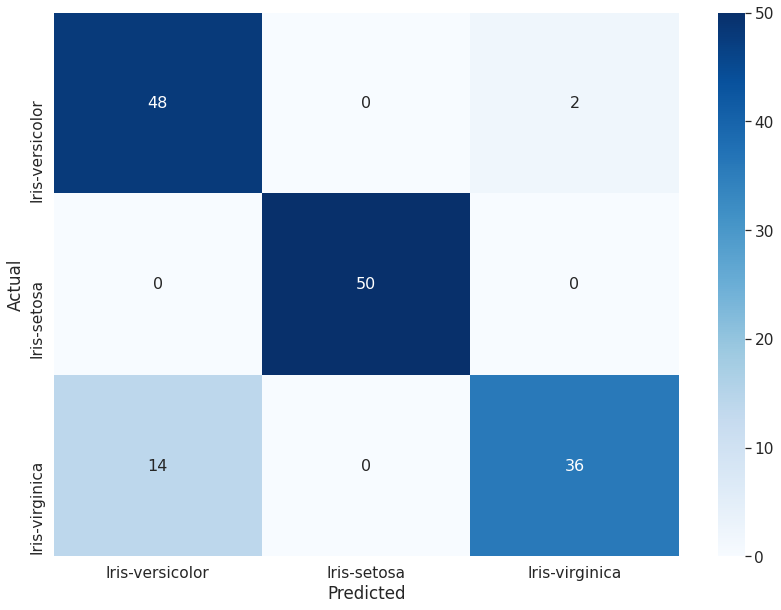

In [ ]:
import scikitplot as skplt
true_labels = ["Iris-versicolor", "Iris-setosa", "Iris-virginica"]
pred_labels = ["Iris-versicolor", "Iris-setosa", "Iris-virginica"]

y_true=df['species']
    
data = confusion_matrix(y_true,y_kmeans)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (14,10))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, cmap="Blues",xticklabels=true_labels,yticklabels=true_labels, annot=True,annot_kws={"size": 16})

From the confusion matrix we can see that out of all 50 data of class Iris-versicolor 48 are correctly predicted whereas 2 are wrongly predicted as Iris-virginica. For 50 data of Iris-setosa all are correctly predicted. And for 50 data of Iris-virginica 36 are correctly predicted whereas 14 are wrongly predicted as Iris-versicolor.

In [ ]:
data["predicted"]=data["predicted"].map({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica,Iris-versicolor


In [ ]:
#

In [ ]:
%%time
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
scores = []
for i in range(2,8):
   print(f'Starting Cluster #{i}')
   aggl_cluster=AgglomerativeClustering(n_clusters=i)
   aggl_cluster.fit(x)
   scores.append(silhouette_score(x,aggl_cluster.labels_,random_state=25))




Starting Cluster #2
Starting Cluster #3
Starting Cluster #4
Starting Cluster #5
Starting Cluster #6
Starting Cluster #7
CPU times: user 40.6 ms, sys: 27.1 ms, total: 67.7 ms
Wall time: 48.2 ms


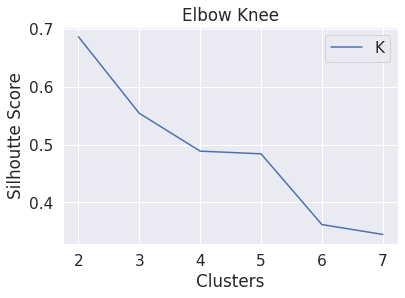

In [ ]:
# plot k vs Silhoutte Score

plt.plot(range(2,8), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Elbow Knee')
plt.legend('Knee')
plt.show()

In [ ]:
aggl_cluster = AgglomerativeClustering(n_clusters=3)
aggl_cluster.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
aggl_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:

# Collect data points from each cluster
clusters_set = {i: np.where(aggl_cluster.labels_ == i)[0] for i in range(aggl_cluster.n_clusters)}

clusters_set

{0: array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113,
        114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149]),
 1: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 2: array([ 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115,
        116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135,
        136, 137, 139, 140, 141, 143, 144, 145, 147, 148])}

In [ ]:
agg_pred=aggl_cluster.fit_predict(x)

In [ ]:
df1=data.copy()
df1["species"]=df1["species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
df1['predicted']=agg_pred
df1

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


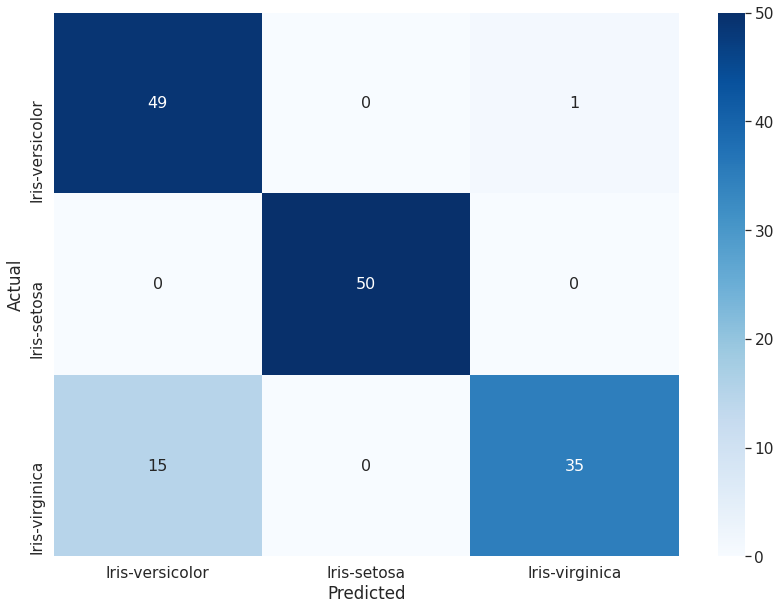

In [ ]:
import scikitplot as skplt
true_labels = ["Iris-versicolor", "Iris-setosa", "Iris-virginica"]
pred_labels = ["Iris-versicolor", "Iris-setosa", "Iris-virginica"]

y_true=df1['species']
    
data = confusion_matrix(y_true,agg_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (14,10))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, cmap="Blues",xticklabels=true_labels,yticklabels=true_labels, annot=True,annot_kws={"size": 16})

From the confusion matrix we can see that out of all 50 data of class Iris-versicolor 49 are correctly predicted whereas 2 are wrongly predicted as Iris-virginica. For 50 data of Iris-setosa all are wcorrectly predicted. And for 50 data of Iris-virginica 35 are correctly predicted whereas 15 are wrongly predicted as Iris-versicolor.